In [2]:
import nest_asyncio
import PyUber
import warnings
import time
import asyncio
import pandas as pd
from datetime import datetime
nest_asyncio.apply() #### To allow async Pyuber code execution inside a jupyter nb
warnings.filterwarnings("ignore", message="pandas only supports SQLAlchemy connectable")

In [3]:
import subprocess
import sys
import importlib.util
import platform

In [4]:
def uninstall(package):
    """Uninstall a specified package."""
    print(f"Attempting to uninstall {package}...")
    subprocess.check_call([sys.executable, '-m', 'pip', 'uninstall', '-y', package])
    print(f"Uninstallation of {package} complete.")

def install(package):
    """Install a package. Open a new terminal window on Windows to display progress."""
    print(f"Installing {package}...")
    subprocess.run([sys.executable, "-m", "pip", "install", package], check=True)
    print(f"Installation of {package} complete.")

In [5]:
# Informative print statement before checking Python dependencies
print("Checking Python dependencies for LAK Lot Dispo OneClick...")

Checking Python dependencies for LAK Lot Dispo OneClick...


In [6]:
# List of required packages
packages = [
    'pandas',
    'PyUber',
    'pytz',
    'matplotlib',
    'numpy'
]

In [7]:
# Check and install missing packages
for package in packages:
    if importlib.util.find_spec(package) is None:
        print(f"{package} is not installed. Installing now...")
        install(package)
    else:
        print(f"{package} is already installed.")


pandas is already installed.
PyUber is already installed.
pytz is already installed.
matplotlib is already installed.
numpy is already installed.


In [8]:
# List of packages to import for step indicator
import_modules = [
    'datetime', 'timedelta', 'pandas', 'PyUber', 'pytz', 'urllib.parse', 
    'webbrowser', 'json', 'matplotlib.pyplot', 'numpy', 
    'matplotlib.dates', 'tkinter', 'ttk', 'io.BytesIO', 'base64', 'tempfile', 'os'
]

In [9]:
imported_count = 0
total_imports = len(import_modules)

try:
    print("Importing Packages")
    
    from datetime import datetime, timedelta 
    imported_count += 1
    print(f"Imported datetime, timedelta({imported_count}/{total_imports})")
    
    import pandas as pd 
    imported_count += 1
    print(f"Imported pandas ({imported_count}/{total_imports})")
    
    import PyUber 
    imported_count += 1
    print(f"Imported PyUber ({imported_count}/{total_imports})")
    
    import pytz
    imported_count += 1
    print(f"Imported pytz ({imported_count}/{total_imports})")
    
    import urllib.parse 
    imported_count += 1 
    print(f"Imported urllib.parse ({imported_count}/{total_imports})")
    
    import webbrowser 
    imported_count += 1
    print(f"Imported webbrowser ({imported_count}/{total_imports})")
    
    import json 
    imported_count += 1
    print(f"Imported json ({imported_count}/{total_imports})")
    
    import matplotlib.pyplot as plt 
    imported_count += 1
    print(f"Imported matplotlib.pyplot ({imported_count}/{total_imports})")
    
    import numpy as np 
    imported_count += 1
    print(f"Imported numpy ({imported_count}/{total_imports})")
    
    from matplotlib.dates import DateFormatter, date2num, num2date
    imported_count += 1
    print(f"Imported DateFormatter, date2num, num2date ({imported_count}/{total_imports})")
    
    import tkinter as tk 
    imported_count += 1
    print(f"Imported tkinter ({imported_count}/{total_imports})")
    
    from tkinter import ttk 
    imported_count += 1
    print(f"Imported ttk ({imported_count}/{total_imports})")
    
    from io import BytesIO 
    imported_count += 1
    print(f"Imported io.BytesIO ({imported_count}/{total_imports})")
    
    import base64
    imported_count += 1
    print(f"Imported base64 ({imported_count}/{total_imports})")
    
    import tempfile 
    imported_count += 1
    print(f"Imported tempfile ({imported_count}/{total_imports})")
    
    import os 
    imported_count += 1
    print(f"Imported os ({imported_count}/{total_imports})")
    
    print("All imports successful")
    
except ImportError as e:
    print(f"Import error at step {imported_count + 1}/{total_imports}: {e}")

Importing Packages
Imported datetime, timedelta(1/17)
Imported pandas (2/17)
Imported PyUber (3/17)
Imported pytz (4/17)
Imported urllib.parse (5/17)
Imported webbrowser (6/17)
Imported json (7/17)
Imported matplotlib.pyplot (8/17)
Imported numpy (9/17)
Imported DateFormatter, date2num, num2date (10/17)
Imported tkinter (11/17)
Imported ttk (12/17)
Imported io.BytesIO (13/17)
Imported base64 (14/17)
Imported tempfile (15/17)
Imported os (16/17)
All imports successful


In [10]:
sites = ['D1D']
ds = [f'{site}_PROD_XEUS' for site in sites]

In [11]:
####################
###################
###################



def sql_waferChamberHistory(operation, lot):
    """ 
    Construct the updated SQL query with given operation and lot
    """ 
    
    return f""" 
    SELECT 'D1D' "SITE"
      ,h.RUNKEY
      ,h.BATCH_ID
      ,h.LOTOPERKEY
      ,h.LOT
      ,h.OPERATION
      ,h.ROUTE
      ,c.WAFER "WAFER_ID"
      ---,c.SLOT
      ,CAST(c.SLOT AS INTEGER) "SLOT"
      ,c.START_TIME
      ,c.END_TIME
      ,c.STATE
      ,c.ENTITY
      ,c.CHAMBER
      ,c.ENTITY_CHAMBER
      ,c.SUBENTITY
      ,c.SUB_OPERATION
      ,c.CHAMBER_SEQUENCE
      ,c.CHAMBER_PROCESS_ORDER "PROCESS_ORDER"
      ,c.CHAMBER_PROCESS_DURATION "PROCESS_TIME"
      ,c.IN_SUITCASE_FLAG
      ,lr.RECIPE "LOT_RECIPE"
      ,wr.RECIPE "WAFER_RECIPE"
      ,cr.RECIPE "CHAMBER_RECIPE"
      ,a.ATTRIBUTE_STRING "ATTRIBUTES"
      ,h.PRODUCT
      ,h.LAST_TXN_TIME
    FROM F_LOTENTITYHIST h
    INNER JOIN F_WAFERENTITYHIST w
      ON w.RUNKEY=h.RUNKEY
      AND w.ENTITY=h.ENTITY
    INNER JOIN F_WAFERCHAMBERHIST c
      ON c.RUNKEY=h.RUNKEY
      AND c.ENTITY=h.ENTITY
      AND c.WAFER=w.WAFER
    INNER JOIN F_LOT_WAFER_RECIPE wr
      ON wr.RECIPE_ID=w.WAFER_RECIPE_ID
    INNER JOIN F_LOT_WAFER_RECIPE lr
      ON lr.RECIPE_ID=h.LOT_RECIPE_ID
    INNER JOIN F_LOT_WAFER_RECIPE cr
      ON cr.RECIPE_ID=c.WAFER_CHAMBER_RECIPE_ID
    INNER JOIN F_LOT_WAFER_ATTRIBUTE a
      ON a.ATTRIBUTE_ID=c.ATTRIBUTE_ID
    WHERE h.ENTITY IN (SELECT ENTITY FROM F_ENTITY WHERE (ENTITY LIKE 'BSP%' ESCAPE '\\'))
      AND h.LAST_TXN_TIME>=TRUNC(CURRENT_DATE)-60
      AND h.OPERATION IN ('{operation}')
      AND h.LOT='{lot}'

    """ 

In [12]:
############################################
###########################################        

def run_sql(sql=None, datasource='ds'):
    """
    Connect to a database with a connection and run a query. Return data as a dataframe.
    """
    try:
        cxn = PyUber.connect(datasource)
        result = cxn.execute(sql)
        rows = result.fetchall()
        column_names = [x[0] for x in result.description]
        df = pd.DataFrame(rows, columns=column_names)
        return df
    except Exception as e:
        print(datetime.now(), '|', 'ERROR. Could not execute query:', e)
    finally:
        cxn.close()

In [13]:
########################################
#######################################
def plot_to_base64():
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    return base64.b64encode(buf.getvalue()).decode('utf-8')

In [14]:
################################################
###############################################
def display_html_in_browser(html_content):
    file_path = os.path.expanduser("~/test_page.html")
    
    with open(file_path, "w") as f:
        f.write(html_content)
    
    webbrowser.open("file://" + file_path)

In [15]:
##############################
##############################

def export_to_html(df, plot_img_base64):
    html_table = df.to_html(classes='table', index=False, border=0)
    html_content = f'''
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <title>Wafer History Table</title>
        <style>
            /* Your CSS styles here */
        </style>
    </head>
    <body>
        <h2 style="text-align: center;">Wafer History</h2>
        {html_table}
        <div style="text-align: center;">
            <img src="data:image/png;base64,{plot_img_base64}" alt="Wafer History Plot"/>
        </div>
    </body>
    </html>
    '''
    display_html_in_browser(html_content)

In [16]:
lot = "D438FB90"
operation = "250934"

updated_query = sql_waferChamberHistory(operation, lot)
print(updated_query)

 
    SELECT 'D1D' "SITE"
      ,h.RUNKEY
      ,h.BATCH_ID
      ,h.LOTOPERKEY
      ,h.LOT
      ,h.OPERATION
      ,h.ROUTE
      ,c.WAFER "WAFER_ID"
      ---,c.SLOT
      ,CAST(c.SLOT AS INTEGER) "SLOT"
      ,c.START_TIME
      ,c.END_TIME
      ,c.STATE
      ,c.ENTITY
      ,c.CHAMBER
      ,c.ENTITY_CHAMBER
      ,c.SUBENTITY
      ,c.SUB_OPERATION
      ,c.CHAMBER_SEQUENCE
      ,c.CHAMBER_PROCESS_ORDER "PROCESS_ORDER"
      ,c.CHAMBER_PROCESS_DURATION "PROCESS_TIME"
      ,c.IN_SUITCASE_FLAG
      ,lr.RECIPE "LOT_RECIPE"
      ,wr.RECIPE "WAFER_RECIPE"
      ,cr.RECIPE "CHAMBER_RECIPE"
      ,a.ATTRIBUTE_STRING "ATTRIBUTES"
      ,h.PRODUCT
      ,h.LAST_TXN_TIME
    FROM F_LOTENTITYHIST h
    INNER JOIN F_WAFERENTITYHIST w
      ON w.RUNKEY=h.RUNKEY
      AND w.ENTITY=h.ENTITY
    INNER JOIN F_WAFERCHAMBERHIST c
      ON c.RUNKEY=h.RUNKEY
      AND c.ENTITY=h.ENTITY
      AND c.WAFER=w.WAFER
    INNER JOIN F_LOT_WAFER_RECIPE wr
      ON wr.RECIPE_ID=w.WAFER_RECIPE_ID
    IN

In [17]:
waferChamberHistory = run_sql(updated_query, ds)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
# waferChamberHistory.head()

In [18]:
waferChamberHistory.head()

,SITE,RUNKEY,BATCH_ID,LOTOPERKEY,LOT,OPERATION,ROUTE,WAFER_ID,SLOT,START_TIME,END_TIME,STATE,ENTITY,CHAMBER,ENTITY_CHAMBER,SUBENTITY,SUB_OPERATION,CHAMBER_SEQUENCE,PROCESS_ORDER,PROCESS_TIME,IN_SUITCASE_FLAG,LOT_RECIPE,WAFER_RECIPE,CHAMBER_RECIPE,ATTRIBUTES,PRODUCT,LAST_TXN_TIME
0,D1D,202515.182802,714035256.0,5.622229e+09,D438FB90,250934,FE80.2QT1A,5DUIG655MVD7,9,2025-04-08 11:45:41.454,2025-04-08 11:53:28.610,Completed,BSP02,CT-B,BSP02_CT-B,None,Process-2,6.0,3.0,7.79,N,P80N_ELIM_4_NT,P80N_ELIM_4_NT,P80N_ELIM_4_NT,None,1Q802V A A,2025-04-08 12:23:43.516
1,D1D,202515.182802,714035256.0,5.622229e+09,D438FB90,250934,FE80.2QT1A,5DUIG655MVD7,9,NaT,2025-04-08 11:55:56.041,Completed,BSP02,CT-B,BSP02_CT-B,None,Process-4,8.0,4.0,NaN,N,P80N_ELIM_4_NT,P80N_ELIM_4_NT,P80N_ELIM_4_NT,None,1Q802V A A,2025-04-08 12:23:43.516
2,D1D,202515.182802,714035256.0,5.622229e+09,D438FB90,250934,FE80.2QT1A,5DUIG655MVD7,9,2025-04-08 11:42:14.519,2025-04-08 11:45:39.772,Completed,BSP02,FRONT CHUCK TABLE,BSP02_FRONT CHUCK TABLE,None,Table-1,4.0,6.0,3.42,N,P80N_ELIM_4_NT,P80N_ELIM_4_NT,P80N_ELIM_4_NT,None,1Q802V A A,2025-04-08 12:23:43.516
3,D1D,202515.182802,714035256.0,5.622229e+09,D438FB90,250934,FE80.2QT1A,5DUIG655MVD7,9,2025-04-08 11:32:09.981,2025-04-08 11:37:21.901,Completed,BSP02,POSITION TABLE,BSP02_POSITION TABLE,None,Position-1,2.0,6.0,5.20,N,P80N_ELIM_4_NT,P80N_ELIM_4_NT,P80N_ELIM_4_NT,None,1Q802V A A,2025-04-08 12:23:43.516
4,D1D,202515.182802,714035256.0,5.622229e+09,D438FB90,250934,FE80.2QT1A,5DUIG655MVD7,9,2025-04-08 11:31:51.474,2025-04-08 11:32:09.947,Completed,BSP02,ROBOT,BSP02_ROBOT,None,Robot-1,1.0,6.0,0.31,N,P80N_ELIM_4_NT,P80N_ELIM_4_NT,P80N_ELIM_4_NT,None,1Q802V A A,2025-04-08 12:23:43.516


In [19]:
####################
###################
###################



def sql_spc():
    """ 
    Construct the updated SQL query with given operation and lot
    """ 
    
    return f"""
select *
from f_entityattribute ea
where ea.entity in ('BSP02', 'BSP05', 'BSP07', 'BSP409', \
                    'BSP411', \
                    'TBT01', 'TBT02', 'TBT03', 'TBT04', 'TBT405', 'TBT407', 'TBT409', 'TBT411', 'TBT413')
and ea.attribute_name like 'SPCChartValidation%'

    """ 

In [20]:
query = sql_spc()
df = run_sql(query, ds)

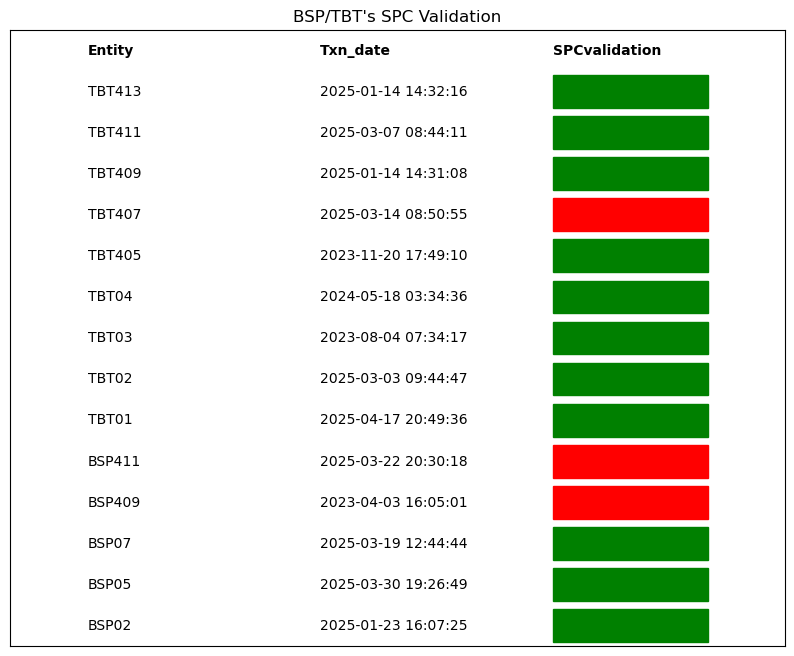

In [21]:
df['TXN_DATE'] = pd.to_datetime(df['TXN_DATE'])

#Create the plot
fig, ax = plt.subplots(figsize=(10,8))

#Adding headers
ax.text(0.1, len(df), "Entity", va='center', fontweight='bold')
ax.text(0.4, len(df), "Txn_date", va='center', fontweight='bold')
ax.text(0.7, len(df), 'SPCvalidation', va='center', fontweight='bold')

#Iterate over the dataframe rows
for index, row in df.iterrows():
    color = 'green' if row['ATTRIBUTE_VALUE'] == 'Y' else 'red'
    
    #Plot the entity and transaction date with a colored box
    ax.text(0.1, index, row['ENTITY'], va='center')
    ax.text(0.4, index, row['TXN_DATE'].strftime('%Y-%m-%d %H:%M:%S'), va='center')
    ax.add_patch(plt.Rectangle((0.7, index - 0.4), 0.2, 0.8, color=color))
    
#Set the limits and labels
ax.set_xlim(0,1)
ax.set_ylim(-0.5, len(df) + 0.5)
ax.set_xticks([])
ax.set_yticks([]) 

# Set title and show plot
ax.set_title("BSP/TBT's SPC Validation")
plt.show()
    

In [27]:
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
import smtplib

In [28]:
# Convert TXN_DATE to datetime
df['TXN_DATE'] = pd.to_datetime(df['TXN_DATE'])

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Adding headers
ax.text(0.1, len(df), "Entity", va='center', fontweight='bold')
ax.text(0.4, len(df), "Txn_date", va='center', fontweight='bold')

# Iterate over the DataFrame rows
for index, row in df.iterrows():
    color = 'green' if row['ATTRIBUTE_VALUE'] == 'Y' else 'red'
    
    # Plot the entity and transaction date with a colored box
    ax.text(0.1, index, row['ENTITY'], va='center')
    ax.text(0.4, index, row['TXN_DATE'].strftime('%Y-%m-%d %H:%M:%S'), va='center')
    ax.add_patch(plt.Rectangle((0.7, index - 0.4), 0.2, 0.8, color=color))

# Set the limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(df) + 0.5)
ax.set_xticks([])
ax.set_yticks([])

# Set title
ax.set_title("BSP's SPC Validation")

# Save the plot as an image file
image_path = 'spc_validation_plot.png'
plt.savefig(image_path)
plt.close(fig)

# Email setup
me = "maximillian.jacob@intel.com"
you = "maximillian.jacob@intel.com"

# Create message container
msg = MIMEMultipart('related')  # Use 'related' to allow embedding images
msg['Subject'] = "Subject123123"
msg['From'] = me
msg['To'] = you

# HTML content
html = """\
<html>
 <head>
 <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
 <title>html title</title>
 <style type="text/css" media="screen">
 table{
 background-color: #AAD373;
 empty-cells:hide;
 }
 td.cell{
 background-color: white;
 }
 table, th, td {
 border: 1px solid black;
}
 </style>
</head>
 <body>
 <table>
 <tr>
 <th>Entity</th>
 <th>Txn_date</th>
 </tr>
 <tr>
 <td>TBT413</td>
 <td>2025-01-14 14:32:16</td>
 </tr>
 <tr>
 <td>TBT411</td>
 <td>2025-03-07 08:44:11</td>
 </tr>
 <tr>
 <td>TBT409</td>
 <td>2025-01-14 14:31:08</td>
 </tr>
 <tr>
 <td>TBT407</td>
 <td>2025-03-14 08:50:55</td>
 </tr>
 </table>
 <img src="cid:image1">
 </body>
</html>
"""

# Attach HTML part
part1 = MIMEText(html, 'html')
msg.attach(part1)

# Attach the image
with open(image_path, 'rb') as img_file:
    img = MIMEImage(img_file.read())
    img.add_header('Content-ID', '<image1>')  # Match this ID in the HTML
    msg.attach(img)

# Send the email
s = smtplib.SMTP('smtp.intel.com')
s.sendmail(me, you, msg.as_string())
s.quit()


(221, b'fmviesa004.fm.intel.com')

In [31]:
# Email setup
me = "maximillian.jacob@intel.com"
you = "maximillian.jacob@intel.com"

# Create message container
msg = MIMEMultipart('alternative')
msg['Subject'] = "Subject123123"
msg['From'] = me
msg['To'] = you

# HTML content
html = """\
<html>
 <head>
 <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
 <title>html title</title>
 <style type="text/css" media="screen">
 table {
 border-collapse: collapse;
 width: 100%;
 }
 th, td {
 border: 1px solid black;
 padding: 8px;
 text-align: left;
 }
 th {
 background-color: #f2f2f2;
 }
 </style>
</head>
 <body>
 <table>
 <tr>
 <th>Entity</th>
 <th>Txn_date</th>
 <th style="width: 40%;">SPC Validation</th>
 </tr>
"""

# Add rows to the HTML table
for index, row in df.iterrows():
    color = 'green' if row['ATTRIBUTE_VALUE'] == 'Y' else 'red'
    html += f"""
    <tr>
    <td>{row['ENTITY']}</td>
    <td>{row['TXN_DATE']}</td>
    <td style="width: 40%; background-color: {color};">{row['ATTRIBUTE_VALUE']}</td>
    </tr>
    """

# Close the HTML content
html += """\
 </table>
 </body>
</html>
"""

# Attach HTML part
part1 = MIMEText(html, 'html')
msg.attach(part1)

# Send the email
s = smtplib.SMTP('smtp.intel.com')
s.sendmail(me, you, msg.as_string())
s.quit()


(221, b'fmviesa006.fm.intel.com')

In [39]:
# Email setup
me = "maximillian.jacob@intel.com"
you = "maximillian.jacob@intel.com"

# Create message container
msg = MIMEMultipart('alternative')
msg['Subject'] = "Subject123123"
msg['From'] = me
msg['To'] = you

# HTML content
#Changing width: 60%
html = """\
<html>
 <head>
 <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
 <title>html title</title>
 <style type="text/css" media="screen">
 table {
 border-collapse: collapse;
 width: 40%; 
 }
 th, td {
 border: 1px solid black;
 padding: 8px;
 text-align: left;
 }
 th {
 background-color: #f2f2f2;
 text-align: center; /* Center-align headers */
 }
 </style>
</head>
 <body>
 <p style="font-size: 16px; font-weight: bold;">SPC Validation Test</p>
 <table>
 <tr>
 <th style="width: 20%;">Entity</th>
 <th style="width: 30%;">Txn_date</th>
 <th style="width: 5%;">SPC Validation</th>
 </tr>
"""

# Add rows to the HTML table
for index, row in df.iterrows():
    color = 'green' if row['ATTRIBUTE_VALUE'] == 'Y' else 'red'
    html += f"""
    <tr>
    <td style='width: 20%;'>{row['ENTITY']}</td>
    <td style="width:30%;">{row['TXN_DATE']}</td>
    <td style="width: 5%; background-color: {color};">{row['ATTRIBUTE_VALUE']}</td>
    </tr>
    """

# Close the HTML content
html += """\
 </table>
 </body>
</html>
"""

# Attach HTML part
part1 = MIMEText(html, 'html')
msg.attach(part1)

# Send the email
s = smtplib.SMTP('smtp.intel.com')
s.sendmail(me, you, msg.as_string())
s.quit()


(221, b'orviesa001.jf.intel.com')

In [ ]:
# Email setup
me = "maximillian.jacob@intel.com"
you = "maximillian.jacob@intel.com"

# Create message container
msg = MIMEMultipart('alternative')
msg['Subject'] = "TBT/BSP SPC Validation Flag Test"
msg['From'] = me
msg['To'] = you

# HTML content
#Changing width: 60%
html = """\
<html>
 <head>
 <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
 <title>html title</title>
 <style type="text/css" media="screen">
 table {
 border-collapse: collapse;
 width: 40%; 
 }
 th, td {
 border: 1px solid black;
 padding: 8px;
 text-align: left;
 }
 th {
 background-color: #f2f2f2;
 text-align: center; /* Center-align headers */
 }
 </style>
</head>
 <body>
 <p style="font-size: 16px; font-weight: bold;">SPC Validation Test</p>
 <table>
 <tr>
 <th style="width: 20%;">Entity</th>
 <th style="width: 30%;">Txn_date</th>
 <th style="width: 5%;">SPC Validation</th>
 </tr>
"""

# Add rows to the HTML table
for index, row in df.iterrows():
    color = 'green' if row['ATTRIBUTE_VALUE'] == 'Y' else 'red'
    html += f"""
    <tr>
    <td style='width: 20%;'>{row['ENTITY']}</td>
    <td style="width:30%;">{row['TXN_DATE']}</td>
    <td style="width: 5%; background-color: {color};">{row['ATTRIBUTE_VALUE']}</td>
    </tr>
    """

# Close the HTML content
html += """\
 </table>
 </body>
</html>
"""

# Attach HTML part
part1 = MIMEText(html, 'html')
msg.attach(part1)

# Send the email
s = smtplib.SMTP('smtp.intel.com')
s.sendmail(me, you, msg.as_string())
s.quit()


(221, b'fmviesa005.fm.intel.com')